In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns
import japanize_matplotlib

In [2]:
x_= list(range(20))
y_ = list(range(20))

Text(0.5, 1.0, 'プロット')

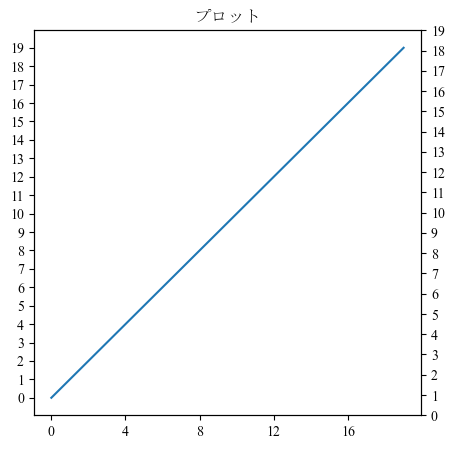

In [35]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.subplots()

ax1.plot(x_,y_)
plt.xticks(list(range(0,20,4)))
plt.yticks(y_)

ax1.set_xticklabels(list(range(0,20,4)),fontname = 'Times New Roman')
ax1.set_yticklabels(y_,fontname ='Times New Roman')


ax2 = ax1.twinx()
ax2.set_yticks(y_)
ax2.set_yticklabels(y_,fontname ='Times New Roman')

plt.title('プロット',fontname='MS Mincho')


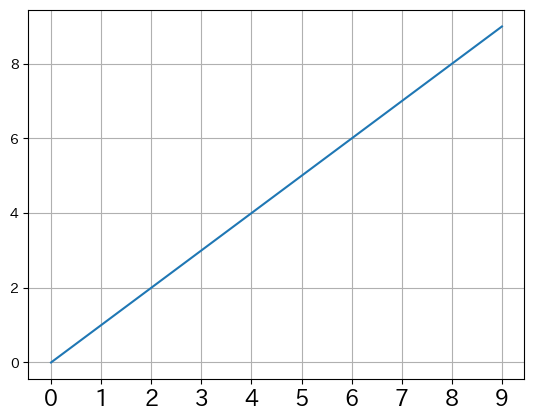

In [20]:
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

xvalues = np.arange(10)
yvalues = xvalues

fig,ax = plt.subplots()
plt.plot(xvalues, yvalues)
plt.xticks(xvalues)
ax.set_xticklabels(xvalues, fontsize=16)
plt.grid(True)

plt.show()

In [21]:
xvalues

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])